In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Total_games = 82 # total games played in official season

In [4]:
Houston_df = pd.read_csv('DATA/output_2018-2019_league_Data.csv')
Houston_df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22018,1610612745,HOU,Houston Rockets,21801218,2019-04-09,HOU @ OKC,L,239,111,...,0.850,9,33,42,18,7,7,11,21,-1.0
1,22018,1610612745,HOU,Houston Rockets,21801200,2019-04-07,HOU vs. PHX,W,240,149,...,0.762,12,40,52,34,12,5,9,16,36.0
2,22018,1610612745,HOU,Houston Rockets,21801184,2019-04-05,HOU vs. NYK,W,241,120,...,0.706,7,41,48,26,8,2,6,21,24.0
3,22018,1610612745,HOU,Houston Rockets,21801176,2019-04-03,HOU @ LAC,W,239,135,...,0.793,12,36,48,22,6,7,16,29,32.0
4,22018,1610612745,HOU,Houston Rockets,21801163,2019-04-02,HOU @ SAC,W,241,130,...,0.706,8,35,43,30,8,3,7,20,25.0


In [5]:
Houston_extract_df = Houston_df[["GAME_ID","MATCHUP","GAME_DATE","WL","PTS"]]
Houston_extract_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS
0,21801218,HOU @ OKC,2019-04-09,L,111
1,21801200,HOU vs. PHX,2019-04-07,W,149
2,21801184,HOU vs. NYK,2019-04-05,W,120
3,21801176,HOU @ LAC,2019-04-03,W,135
4,21801163,HOU @ SAC,2019-04-02,W,130


In [13]:
WL_df_Houston=Houston_extract_df.groupby("WL").count()["GAME_ID"]
WL_df_Houston

WL
L    29
W    53
Name: GAME_ID, dtype: int64

In [14]:
Houston_at_Home_df = Houston_extract_df[Houston_extract_df['MATCHUP'].str.contains("@")]
Houston_at_Home_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS
0,21801218,HOU @ OKC,2019-04-09,L,111
3,21801176,HOU @ LAC,2019-04-03,W,135
4,21801163,HOU @ SAC,2019-04-02,W,130
7,21801111,HOU @ MIL,2019-03-26,L,94
8,21801099,HOU @ NOP,2019-03-24,W,113


In [15]:
Houston_away_df = Houston_extract_df[Houston_extract_df['MATCHUP'].str.contains("vs")]
Houston_away_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS
1,21801200,HOU vs. PHX,2019-04-07,W,149
2,21801184,HOU vs. NYK,2019-04-05,W,120
5,21801138,HOU vs. SAC,2019-03-30,W,119
6,21801126,HOU vs. DEN,2019-03-28,W,112
9,21801084,HOU vs. SAS,2019-03-22,W,111


In [16]:
home_WL = Houston_at_Home_df.groupby("WL").count()["GAME_ID"]
home_WL_df = pd.DataFrame(home_WL)
home_WL_df.columns=['Home']
home_WL_df

,Home
WL,
L,19
W,22


In [17]:
away_WL = Houston_away_df.groupby("WL").count()["GAME_ID"]
away_WL_df = pd.DataFrame(away_WL)
away_WL_df.columns=['Away']
away_WL_df

,Away
WL,
L,10
W,31


In [18]:
WL_df = pd.DataFrame(Total_WL)
WL_df.columns=['Total']

#WL_df.merge(away_WL_df,on="WL")
WL_df

,Total
WL,
L,29
W,53


In [20]:
Total_perc = WL_df["Total"]/Total_games *100
Total_perc_df = pd.DataFrame(Total_perc).round(decimals=2)
Total_perc_df.columns=['Total (%)']
Total_perc_df

,Total (%)
WL,
L,35.37
W,64.63


In [21]:
#WL_df.merge(home_WL_df,on="WL",how="inner")
Houston_WL=pd.merge(WL_df,Total_perc_df,on="WL")
             
Houston_WL

,Total,Total (%)
WL,,
L,29,35.37
W,53,64.63


In [22]:
Houston_WL = pd.merge(Houston_WL,home_WL_df,on="WL")
Houston_WL

,Total,Total (%),Home
WL,,,
L,29,35.37,19
W,53,64.63,22


In [23]:
home_perc = Houston_WL['Home']/Total_games *100
home_perc_df = pd.DataFrame(home_perc).round(decimals=2)
home_perc_df.columns=['Home (%)']
home_perc_df

,Home (%)
WL,
L,23.17
W,26.83


In [24]:
Houston_WL = pd.merge(Houston_WL,home_perc_df,on="WL")
Houston_WL

,Total,Total (%),Home,Home (%)
WL,,,,
L,29,35.37,19,23.17
W,53,64.63,22,26.83


In [25]:
Houston_WL = pd.merge(Houston_WL,away_WL_df,on="WL")
Houston_WL

,Total,Total (%),Home,Home (%),Away
WL,,,,,
L,29,35.37,19,23.17,10
W,53,64.63,22,26.83,31


In [28]:
away_perc = Houston_WL['Away']/Total_games *100
away_perc_df = pd.DataFrame(away_perc).round(decimals=2)
away_perc_df.columns=['Away (%)']
away_perc_df

,Away (%)
WL,
L,12.2
W,37.8


In [29]:
Houston_WL=pd.merge(Houston_WL,away_perc_df,on="WL")
Houston_WL

,Total,Total (%),Home,Home (%),Away,Away (%)
WL,,,,,,
L,29,35.37,19,23.17,10,12.2
W,53,64.63,22,26.83,31,37.8


In [30]:
L=[Houston_WL["Total (%)"][0] , Houston_WL["Home (%)"][0] , Houston_WL["Away (%)"][0] ]
L

[35.37, 23.17, 12.2]

In [31]:
W=[Houston_WL["Total (%)"][1] , Houston_WL["Home (%)"][1] , Houston_WL["Away (%)"][1] ]
W

[64.63, 26.83, 37.8]

<IPython.core.display.Javascript object>


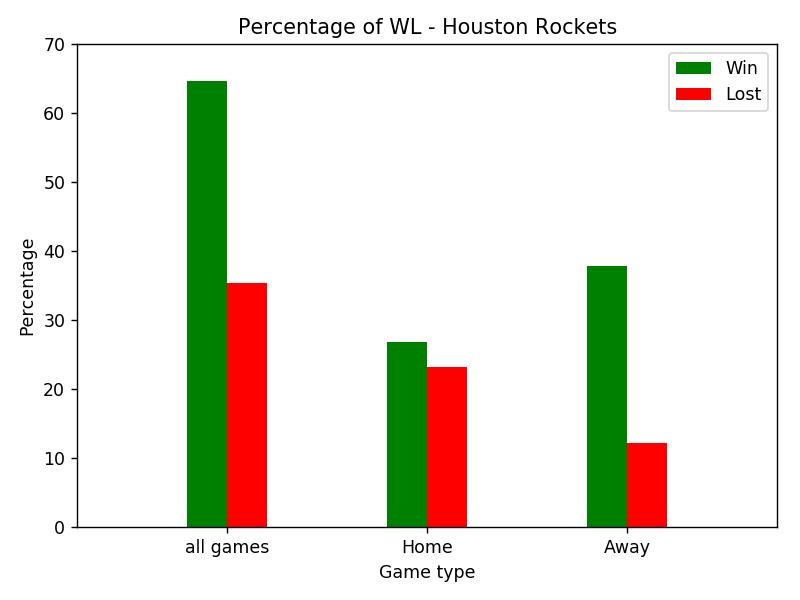

In [32]:
x_axis = np.arange(len(W))
plt.bar(x_axis -0.1,W,width=0.2,color='g',align='center',label="Win")
plt.bar(x_axis+0.1,L,width=0.2,color='r',align='center',label="Lost")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["all games","Home","Away"])

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, round(max(W))+5)


# Give the chart a title, x label, and y label
plt.title("Percentage of WL - Houston Rockets")
plt.xlabel("Game type")
plt.ylabel("Percentage")

plt.legend(loc='best')

plt.tight_layout()
plt.savefig("Houston_WL.png")

In [33]:
plt.show()